In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

## 1 base model

### 1.1 load data

In [4]:
data=pd.read_csv('mean_merged.csv')

In [5]:
data.head()

Reef.ID  reef_latitude  reef_longitude  Year  Month    S1  \
0     14.51.84E.16.14.50S     -16.241667         145.864  2011      3   4.0   
1     14.51.84E.16.14.50S     -16.241667         145.864  2012      6  10.0   
2     14.51.84E.16.14.50S     -16.241667         145.864  2013      5   6.0   
3     14.51.84E.16.14.50S     -16.241667         145.864  2015      8  20.0   
4  145.33.480E.16.22.630S     -16.377167         145.558  2013      8   1.0   

     S2    S3    S4  Average_bleaching  ...  rate_of_SST_change       eta  \
0   2.5   6.5  10.0               5.75  ...            0.018763  0.022501   
1   5.0  10.0   5.0               7.50  ...            0.018763  0.038542   
2  11.0   2.0   5.0               6.00  ...            0.018763  0.167768   
3  35.0  40.0  20.0              28.75  ...            0.018763  0.015005   
4   1.0   5.0   0.0               1.75  ...            0.018763  0.085692   

        salt       temp  wspeed_u  wspeed_v  mean_wspeed         u         v  \
0  33.301152  29.543096 -2.704580  1.507381     4.623763 -0.129272  0.142504   
1  34.810118  25.272271 -3.246589  5.446759     6.586625 -0.078906  0.056615   
2  34.755774  26.540766 -5.724248  5.733466     8.527769 -0.124774  0.117997   
3  35.342737  24.620164 -4.035695  4.153192     6.170029 -0.028284 -0.101760   
4  35.327310  24.774833 -3.621766  4.102522     5.802169 -0.041876 -0.085202   

   mean_cur  
0  0.294943  
1  0.180601  
2  0.265399  
3  0.206028  
4  0.199118  

[5 rows x 53 columns]

In [17]:
sum(data['Average_bleaching'] < 0)

0

In [18]:
data['Average_bleaching'] = data['Average_bleaching'].apply(lambda x: 'bleached' if x == 0 else 'not bleached')

In [19]:
data['Average_bleaching'].value_counts()

not bleached    221
bleached         44
Name: Average_bleaching, dtype: int64

### model data

In [20]:
y=np.array(data['Average_bleaching'])

X=data.loc[:,['ClimSST','Temperature_Kelvin','Temperature_Kelvin_Standard_Deviation',
        'SSTA_Frequency','SSTA_Frequency_Standard_Deviation',
        'TSA_Frequency_Standard_Deviation','mean_cur']]
X=StandardScaler().fit_transform(X)


xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=420)

## model

In [32]:
#choose the svm model
def kernel_selction(xtrain,ytrain,xtest,ytest):
    kernels=['linear', 'poly', 'rbf', 'sigmoid']
    r2=[]
    for k in kernels:
        svc=SVC(kernel=k).fit(xtrain,ytrain)
        r2.append(svc.score(xtest,ytest)) #choose rbf
    plt.figure(figsize=(10,8))
    plt.plot(kernels,r2)
    plt.title('kernel selection')
    plt.grid()
    plt.show()

In [33]:
def C_selection(m,n,j,k,xtrain,ytrain,xtest,ytest):
    c=np.arange(m,n,j)
    r2=[]
    for i in c:
        svc=SVC(kernel=k,C=i).fit(xtrain,ytrain)
        r2.append(svc.score(xtest,ytest))
    plt.figure(figsize=(10,8))
    plt.plot(c,r2)
    plt.grid()
    plt.title('C-selection')
    plt.show()

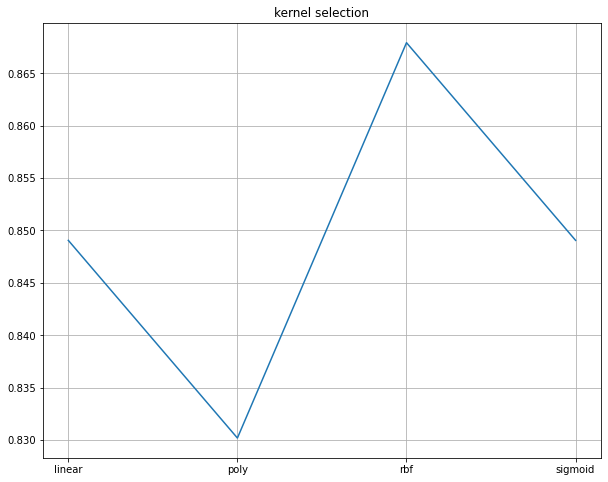

In [34]:
kernel_selction(xtrain,ytrain,xtest,ytest)

In the above model, four different SVM kernel functions are used to construct the classification model. Score is measured by accuracy. You can see that the RBF kernel works best.

### 2.1 accuracy

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [76]:
svc = SVC(kernel='linear',C=100, probability= True).fit(xtrain,ytrain)
pred_linear = svc.predict(xtest)
predba_linear = svc.predict_proba(xtest)

rbf_cm = confusion_matrix(ytest, pred_linear)
rbf_accuracy = accuracy_score(ytest, pred_linear)

print(rbf_cm)
print(rbf_accuracy)

[[ 0  8]
 [ 0 45]]
0.8490566037735849


In [77]:
svc = SVC(kernel='poly',C=100, probability= True).fit(xtrain,ytrain)
pred_poly = svc.predict(xtest)
predba_poly = svc.predict_proba(xtest)

rbf_cm = confusion_matrix(ytest, pred_poly)
rbf_accuracy = accuracy_score(ytest, pred_poly)

print(rbf_cm)
print(rbf_accuracy)

[[ 3  5]
 [ 4 41]]
0.8301886792452831


In [78]:
svc = SVC(kernel='rbf',C=100, probability= True).fit(xtrain,ytrain)
pred_rbf = svc.predict(xtest)
predba_rbf = svc.predict_proba(xtest)

rbf_cm = confusion_matrix(ytest, pred_rbf)
rbf_accuracy = accuracy_score(ytest, pred_rbf)

print(rbf_cm)
print(rbf_accuracy)

[[ 3  5]
 [ 4 41]]
0.8301886792452831


In [79]:
svc = SVC(kernel='sigmoid',C=100, probability= True).fit(xtrain,ytrain)
pred_sigmoid = svc.predict(xtest)
predba_sigmoid = svc.predict_proba(xtest)

rbf_cm = confusion_matrix(ytest, pred_sigmoid)
rbf_accuracy = accuracy_score(ytest, pred_sigmoid)

print(rbf_cm)
print(rbf_accuracy)

[[ 1  7]
 [10 35]]
0.6792452830188679


### 2.2 stability  and scalability

Different kernel functions are used below to explore the stability of the model. Using the same kernel, change the number of C. As can be seen from the figure below, linear model has the best stability.

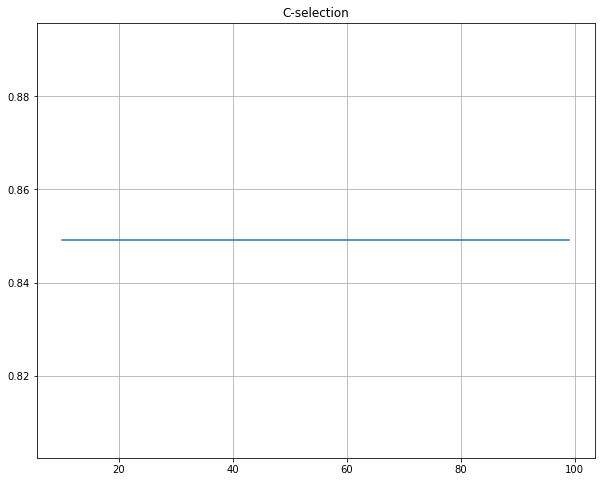

In [64]:
C_selection(10,100,1,'linear',xtrain,ytrain,xtest,ytest)

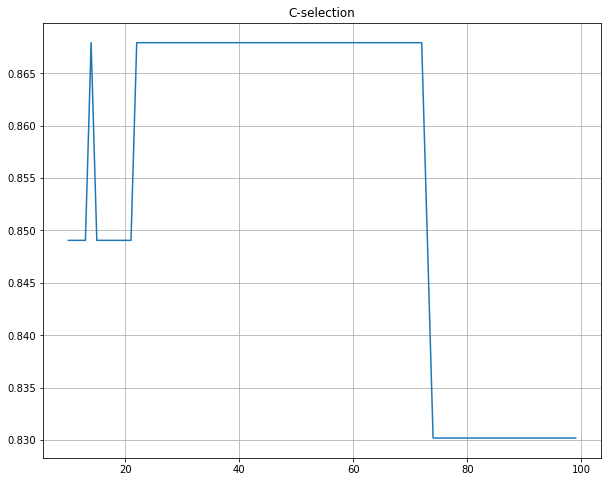

In [66]:
C_selection(10,100,1,'poly',xtrain,ytrain,xtest,ytest)

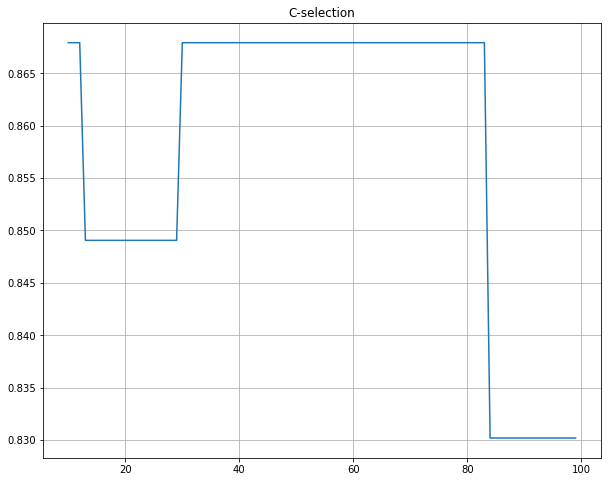

In [67]:
C_selection(10,100,1,'rbf',xtrain,ytrain,xtest,ytest)

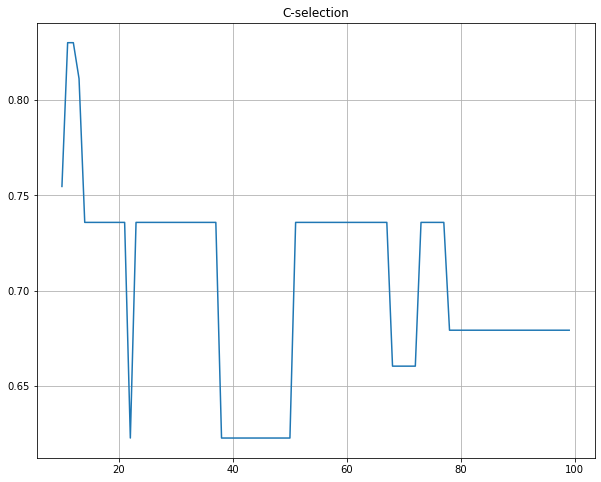

In [68]:
C_selection(10,100,1,'sigmoid',xtrain,ytrain,xtest,ytest)

### 2.3 interpretability

The linear kernel function is used to explore the relationship between mean_cur and dependent variables. It can be seen from the following opening that the larger mean_cur value is, the less probability that the dependent variable is not bleached. The higher the current average speed, the lower the probability of coral bleaching.

In [73]:
svc = SVC(kernel='linear',C=100, probability= True).fit(xtrain,ytrain)
svc.coef_

array([[ 8.29758467e-05, -1.71974901e-06,  1.64880197e-04,
        -7.72573876e-05,  2.88137818e-04, -2.04656511e-04,
        -1.89002657e-05]])

### 2.4 accuracy plot

In order to more fully observe the accuracy of each model. I also predicted the probability of the dependent variable where the model accuracy was calculated using four kernels. ROC curves can be drawn based on probability prediction and category prediction respectively as shown below.

In [96]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score

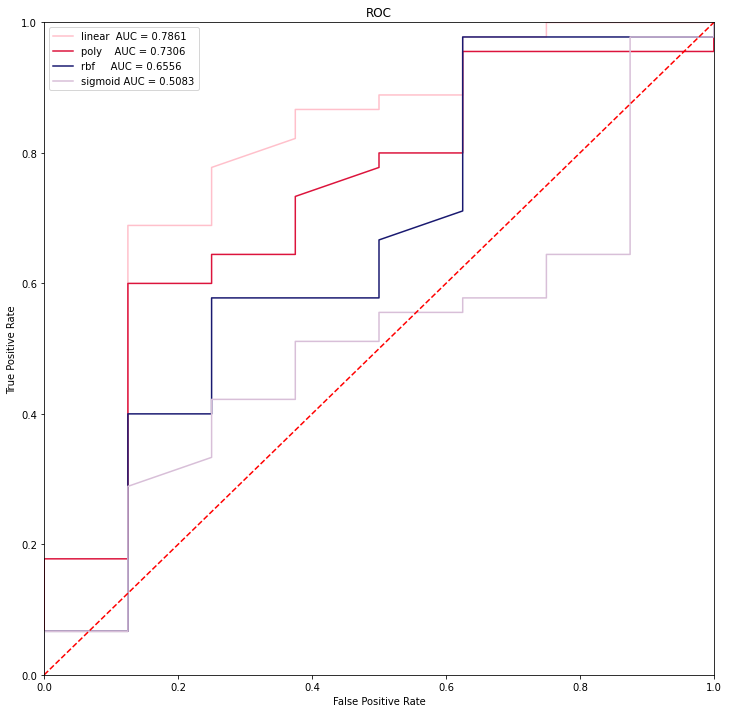

In [98]:
label  = [ 1 if i == 'not bleached' else 0 for i in ytest]

fpr1, tpr1, threshold1 = metrics.roc_curve(label, predba_linear[:, 1])
fpr2, tpr2, threshold2 = metrics.roc_curve(label, predba_poly[:, 1])
fpr3, tpr3, threshold3 = metrics.roc_curve(label, predba_rbf[:, 1])
fpr4, tpr4, threshold4 = metrics.roc_curve(label, predba_sigmoid[:, 1])

roc_auc1 = metrics.auc(fpr1, tpr1)
roc_auc2 = metrics.auc(fpr2, tpr2)
roc_auc3 = metrics.auc(fpr3, tpr3)
roc_auc4 = metrics.auc(fpr4, tpr4)


plt.figure(figsize=(12, 12))
plt.plot(fpr1, tpr1, 'b', label = 'linear  AUC = %0.4f' % roc_auc1, color = '#FFC0CB')
plt.plot(fpr2, tpr2, 'b', label = 'poly    AUC = %0.4f' % roc_auc2, color = '#DC143C')
plt.plot(fpr3, tpr3, 'b', label = 'rbf     AUC = %0.4f' % roc_auc3, color = '#191970')
plt.plot(fpr4, tpr4, 'b', label = 'sigmoid AUC = %0.4f' % roc_auc4, color = '#D8BFD8')

plt.ylim(0,1)
plt.xlim(0,1)
plt.legend(loc='best')
plt.title('ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# 画出对角线
plt.plot([0,1],[0,1],'r--')
plt.show()

## final model

In [99]:
svc = SVC(kernel='rbf',C=100, probability= True).fit(xtrain,ytrain)
pred_rbf = svc.predict(xtest)
predba_rbf = svc.predict_proba(xtest)

rbf_cm = confusion_matrix(ytest, pred_rbf)
rbf_accuracy = accuracy_score(ytest, pred_rbf)

print(rbf_cm)
print(rbf_accuracy)

[[ 3  5]
 [ 4 41]]
0.8301886792452831


In [ ]:
# Save model
import pickle
pickle.dump(svc, open('./svm.pickle', 'wb))

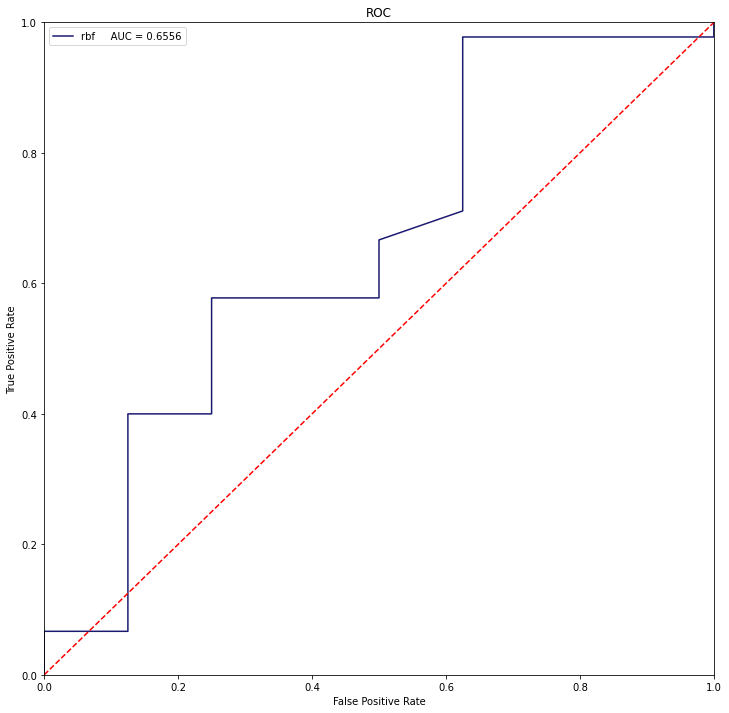

In [100]:
label  = [ 1 if i == 'not bleached' else 0 for i in ytest]

fpr3, tpr3, threshold3 = metrics.roc_curve(label, predba_rbf[:, 1])

roc_auc3 = metrics.auc(fpr3, tpr3)


plt.figure(figsize=(12, 12))
plt.plot(fpr3, tpr3, 'b', label = 'rbf     AUC = %0.4f' % roc_auc3, color = '#191970')

plt.ylim(0,1)
plt.xlim(0,1)
plt.legend(loc='best')
plt.title('ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# 画出对角线
plt.plot([0,1],[0,1],'r--')
plt.show()